# Projet Série Temporelles 

## Libraries Importation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importation des bibliothèques spécifiques aux séries chronologiques
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA

## Data Reading

In [3]:
df=pd.read_csv('AAPL.csv', sep=',')

In [4]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [5]:
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [6]:
df=df.drop(df.columns[0],axis=1)

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [8]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.tz_localize(None)

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1258 non-null   object        
 1   date         1258 non-null   datetime64[ns]
 2   close        1258 non-null   float64       
 3   high         1258 non-null   float64       
 4   low          1258 non-null   float64       
 5   open         1258 non-null   float64       
 6   volume       1258 non-null   int64         
 7   adjClose     1258 non-null   float64       
 8   adjHigh      1258 non-null   float64       
 9   adjLow       1258 non-null   float64       
 10  adjOpen      1258 non-null   float64       
 11  adjVolume    1258 non-null   int64         
 12  divCash      1258 non-null   float64       
 13  splitFactor  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 137.7+ KB


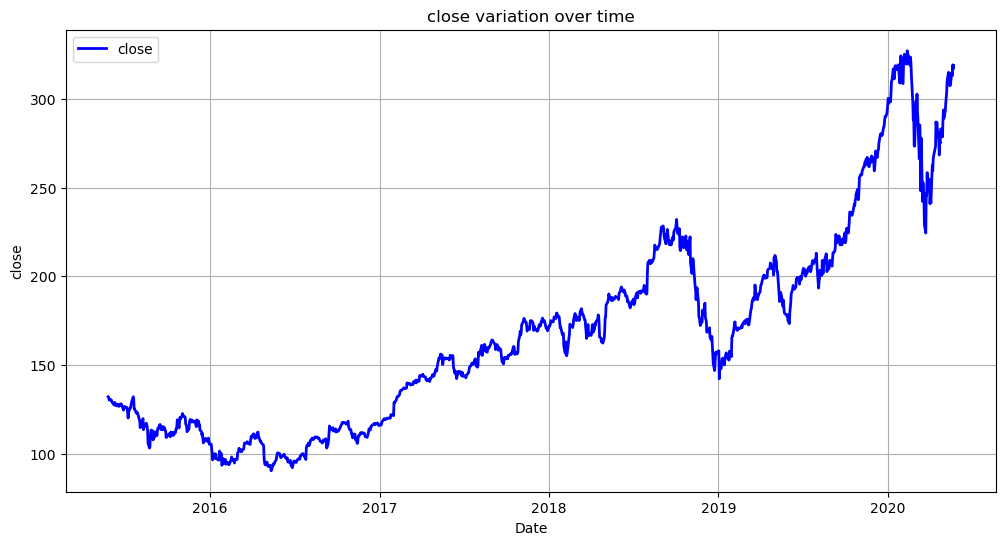

In [11]:
# Plotting price against date
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], linewidth=2, color='b', label='close')
plt.xlabel('Date')
plt.ylabel('close')
plt.title('close variation over time')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
xf=df[['date','close']]

In [13]:
xf

,date,close
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [14]:
xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1258 non-null   datetime64[ns]
 1   close   1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


## Stationnarity Test

In [15]:
# Augmented Dickey-Fuller Test
print('-------------Résultats du Test Dickey Fuller-------------')
dftest = adfuller(xf['close'])
dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value ',
                                                 'No. of Lags used', 'No. of observations used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
dfoutput['Maximized AIC:'] = dftest[5]
print(dfoutput)

-------------Résultats du Test Dickey Fuller-------------
Test Statistic : adf          -0.100130
p-value                        0.949426
No. of Lags used              18.000000
No. of observations used    1239.000000
Critical Value (1%)           -3.435639
Critical Value (5%)           -2.863876
Critical Value (10%)          -2.568013
Maximized AIC:              6572.027548
dtype: float64


<br>
p-value > critical value(0.05) ==> la serie n'est pas stationnaire

## Transformation logarithmique

In [16]:
numeric_df = xf.select_dtypes(include=[np.number])  # Select only numeric columns

In [17]:
ts_log = np.log(numeric_df)

In [18]:
ts_log

,close
0,4.883143
1,4.881134
2,4.869686
3,4.871641
4,4.867227
...,...
1253,5.752446
1254,5.746650
1255,5.765912
1256,5.758428


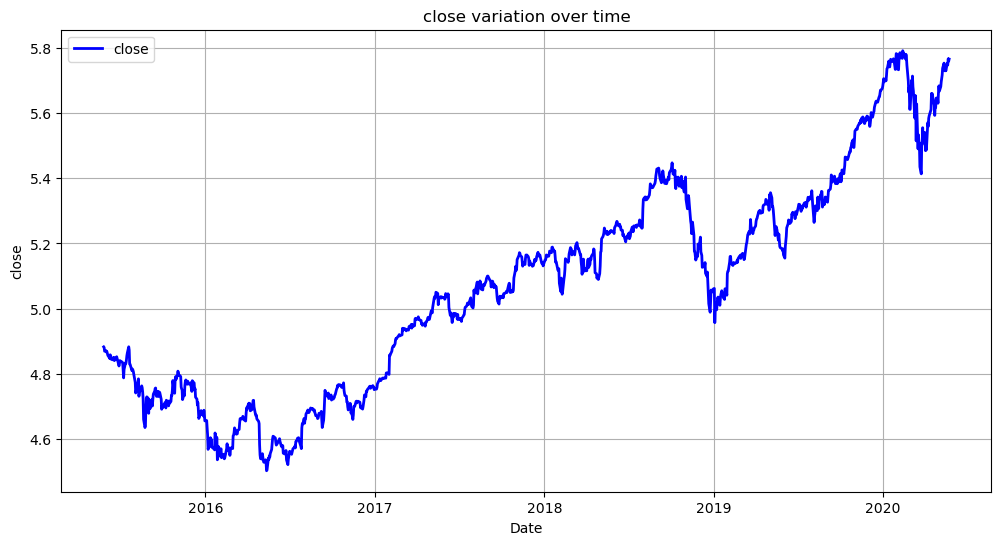

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(xf['date'], ts_log['close'], linewidth=2, color='b', label='close')
plt.xlabel('Date')
plt.ylabel('close')
plt.title('close variation over time')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
log_df=pd.concat([df['date'],ts_log],axis=1)

In [21]:
log_df

,date,close
0,2015-05-27,4.883143
1,2015-05-28,4.881134
2,2015-05-29,4.869686
3,2015-06-01,4.871641
4,2015-06-02,4.867227
...,...,...
1253,2020-05-18,5.752446
1254,2020-05-19,5.746650
1255,2020-05-20,5.765912
1256,2020-05-21,5.758428


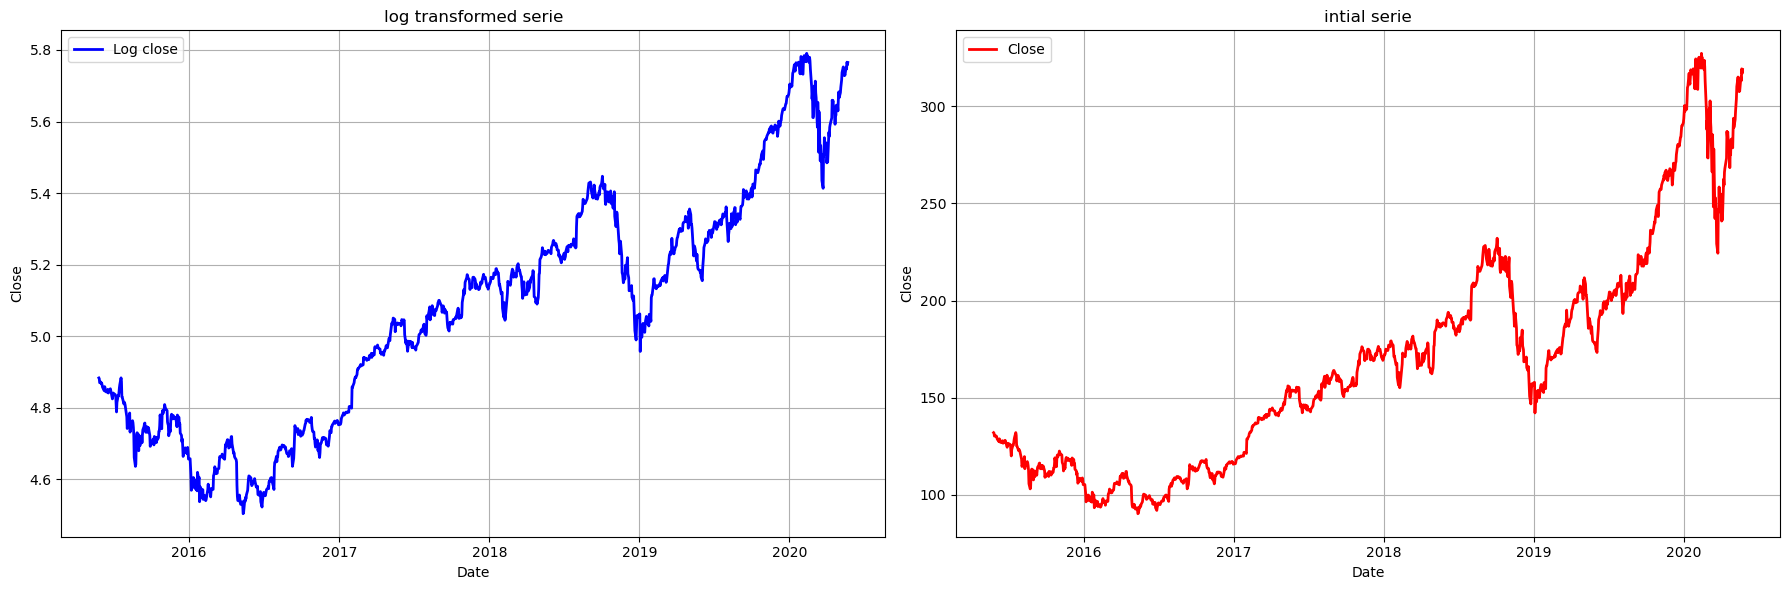

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# First plot
axs[0].plot(log_df['date'], log_df['close'], linewidth=2, color='b', label='Log close')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close')
axs[0].set_title('log transformed serie')
axs[0].legend()
axs[0].grid(True)

# Second plot
axs[1].plot(xf['date'], xf['close'], linewidth=2, color='r', label='Close')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close')
axs[1].set_title('intial serie')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Display both plots
plt.show()


## stationarity verfication

In [23]:
# Augmented Dickey-Fuller Test
print('-------------Résultats du Test Dickey Fuller-------------')
dftest = adfuller(log_df['close'])
dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value ',
                                                 'No. of Lags used', 'No. of observations used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
dfoutput['Maximized AIC:'] = dftest[5]
print(dfoutput)

-------------Résultats du Test Dickey Fuller-------------
Test Statistic : adf          -0.002837
p-value                        0.958297
No. of Lags used               9.000000
No. of observations used    1248.000000
Critical Value (1%)           -3.435601
Critical Value (5%)           -2.863859
Critical Value (10%)          -2.568004
Maximized AIC:             -6439.672023
dtype: float64


le p-value = 0.958>0.05 ==> le serie n'est pas stationnaire 

<br>
puisque la serie n'est pas stationnaire meme lorsqu'on a applique la transformation logarithmique , on peur deduire que notre serie ne suit pas un modele ARMA

C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


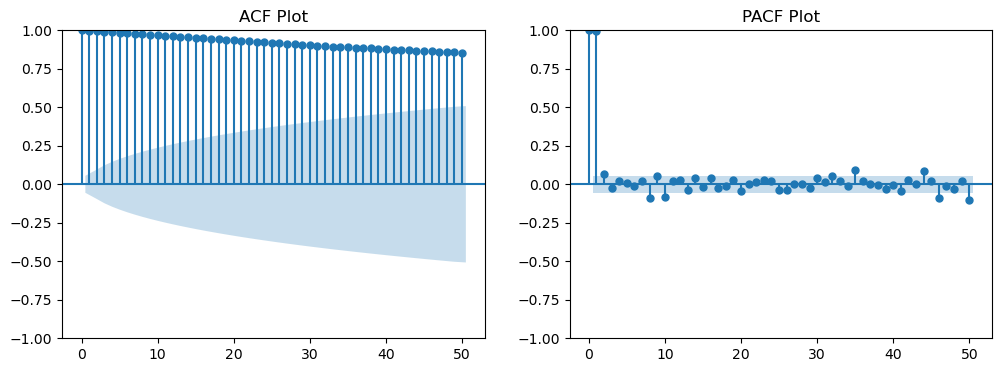

In [24]:
# acf et pacf du serie logarithmiquement transformé
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF Plot
plot_acf(log_df['close'], lags=50, ax=ax1)
ax1.set_title('ACF Plot')

# PACF Plot
plot_pacf(log_df['close'], lags=50, ax=ax2)
ax2.set_title('PACF Plot')

plt.show()

## Differentiation

In [25]:
ts_diff = log_df['close'].diff()

ts_diff


0            NaN
1      -0.002009
2      -0.011448
3       0.001955
4      -0.004415
          ...   
1253    0.023288
1254   -0.005795
1255    0.019261
1256   -0.007483
1257    0.006418
Name: close, Length: 1258, dtype: float64

In [26]:
ts_diff.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1258 entries, 0 to 1257
Series name: close
Non-Null Count  Dtype  
--------------  -----  
1257 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


In [27]:
ts_diff=ts_diff.dropna()

In [28]:
ts_diff

1      -0.002009
2      -0.011448
3       0.001955
4      -0.004415
5       0.001230
          ...   
1253    0.023288
1254   -0.005795
1255    0.019261
1256   -0.007483
1257    0.006418
Name: close, Length: 1257, dtype: float64

In [29]:
log_df_fin=pd.concat([df['date'].drop(0),ts_diff],axis=1)

In [30]:
log_df_fin

,date,close
1,2015-05-28,-0.002009
2,2015-05-29,-0.011448
3,2015-06-01,0.001955
4,2015-06-02,-0.004415
5,2015-06-03,0.001230
...,...,...
1253,2020-05-18,0.023288
1254,2020-05-19,-0.005795
1255,2020-05-20,0.019261
1256,2020-05-21,-0.007483


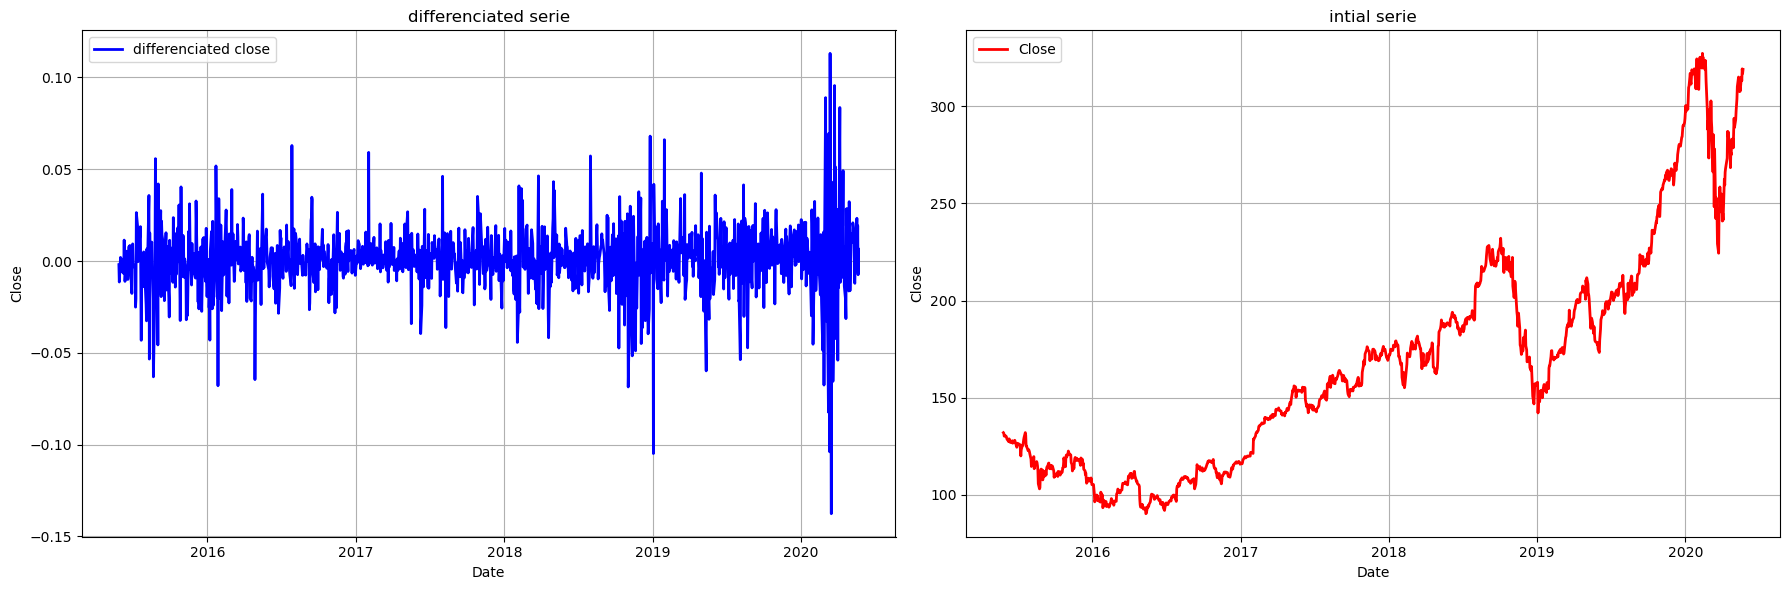

In [31]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# First plot
axs[0].plot(log_df_fin['date'], log_df_fin['close'], linewidth=2, color='b', label='differenciated close')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close')
axs[0].set_title('differenciated serie')
axs[0].legend()
axs[0].grid(True)

# Second plot
axs[1].plot(xf['date'], xf['close'], linewidth=2, color='r', label='Close')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close')
axs[1].set_title('intial serie')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Display both plots
plt.show()


## stationarity verficattion

In [32]:
# Augmented Dickey-Fuller Test
print('-------------Résultats du Test Dickey Fuller-------------')
dftest = adfuller(log_df_fin['close'])
dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value ',
                                                 'No. of Lags used', 'No. of observations used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
dfoutput['Maximized AIC:'] = dftest[5]
print(dfoutput)

-------------Résultats du Test Dickey Fuller-------------
Test Statistic : adf       -1.043890e+01
p-value                     1.540382e-18
No. of Lags used            8.000000e+00
No. of observations used    1.248000e+03
Critical Value (1%)        -3.435601e+00
Critical Value (5%)        -2.863859e+00
Critical Value (10%)       -2.568004e+00
Maximized AIC:             -6.435646e+03
dtype: float64


<br>
p-value < 0.05 ==> la serie est donc stationnaire
<br>
notre serie suit un modele ARIMA d'ordre 1

# p and q value

<Figure size 2000x1000 with 0 Axes>

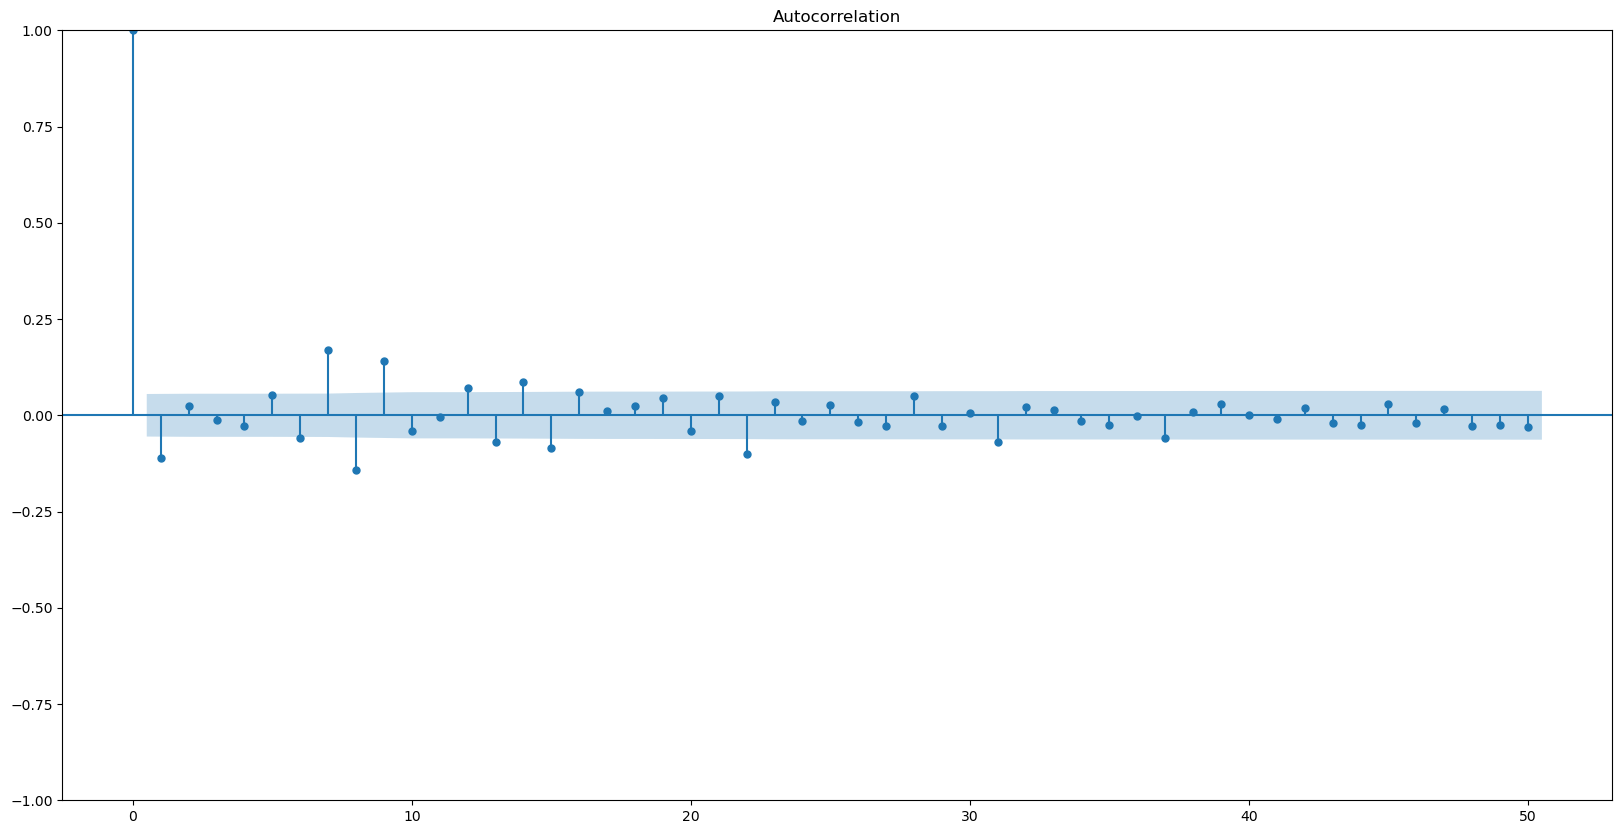

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming ts_diff is your differenced time series
# Modify the lags to match the length of ts_diff or lesser
max_lags = min(50, len(log_df_fin))

plt.rc("figure", figsize=(20, 10))
plt.figure(figsize=(20, 10))
plot_acf(log_df_fin['close'], lags=max_lags)
plt.show()

<br> q=1


C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

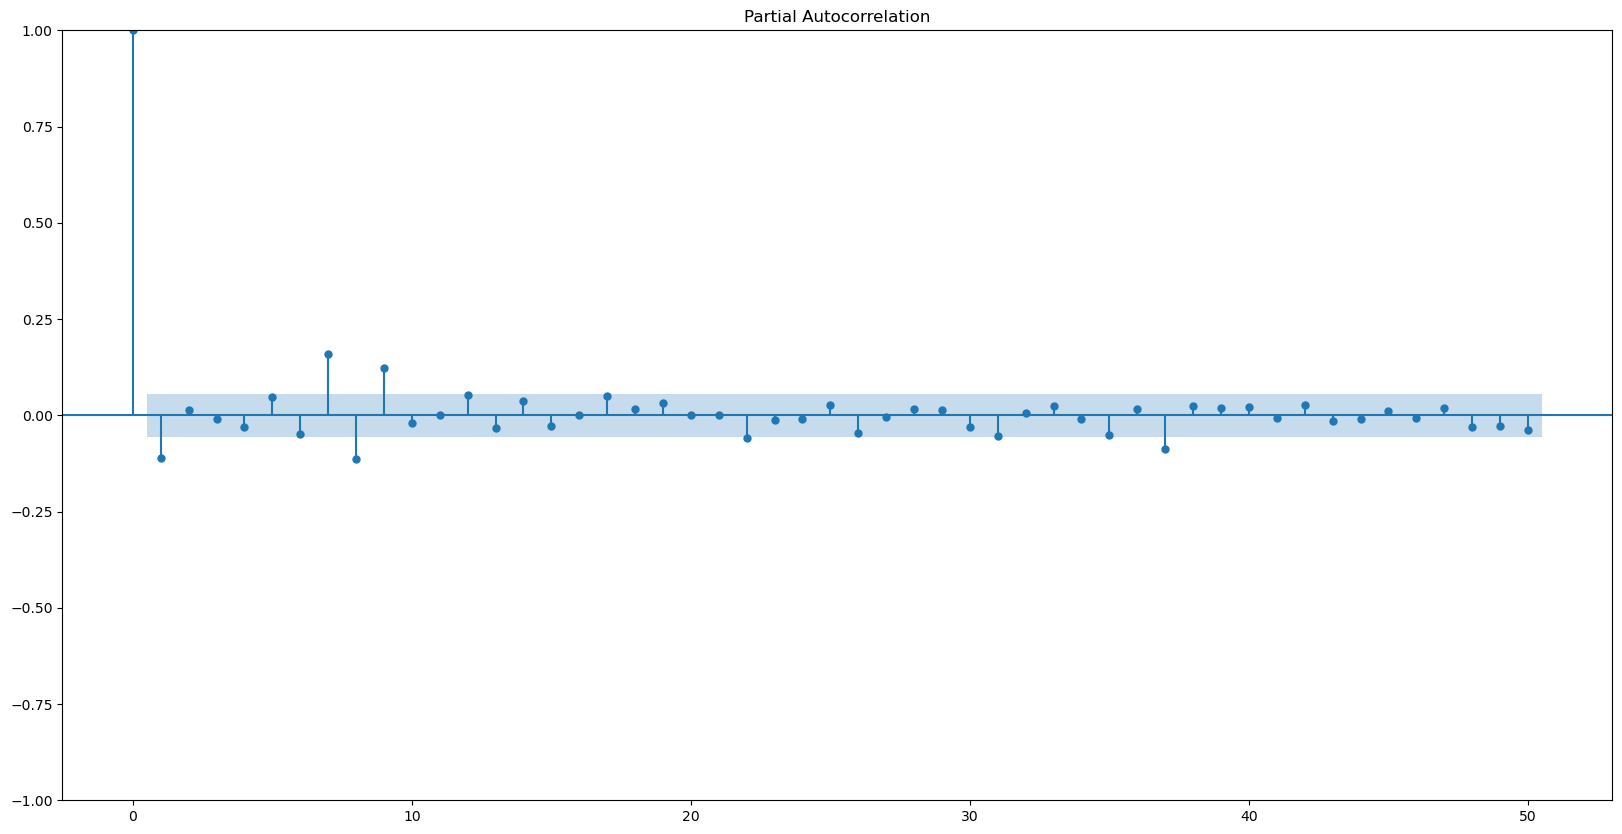

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_pacf(log_df_fin['close'], lags=50)
plt.show()

<br> p=2

<br>
==> on peut conclure que notre serie suit un modele ARIMA d'ordre (1,1,1)

In [35]:
log_df_fin

,date,close
1,2015-05-28,-0.002009
2,2015-05-29,-0.011448
3,2015-06-01,0.001955
4,2015-06-02,-0.004415
5,2015-06-03,0.001230
...,...,...
1253,2020-05-18,0.023288
1254,2020-05-19,-0.005795
1255,2020-05-20,0.019261
1256,2020-05-21,-0.007483


In [36]:
log_df_fin = log_df_fin.set_index('date')

In [37]:
# Splitting TS data into train and test set for model training and testing
train_ts = log_df_fin.iloc[0:1005,]
test_ts = log_df_fin.iloc[1005: ,]

In [38]:
model = ARIMA(train_ts,order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1005
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2731.852
Date:                Wed, 07 May 2025   AIC                          -5457.703
Time:                        20:10:04   BIC                          -5442.968
Sample:                             0   HQIC                         -5452.104
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0178      0.025      0.721      0.471      -0.031       0.066
ma.L1         -0.9999      0.064    -15.648      0.000      -1.125      -0.875
sigma2         0.0003    1.7e-05     14.774      0.0

In [39]:
predictions1 = model_fit.forecast(steps = len(test_ts))

C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [40]:
model_fit.fittedvalues[1:20,]

date
2015-05-29   -0.002009
2015-06-01   -0.006812
2015-06-02   -0.003686
2015-06-03   -0.003980
2015-06-04   -0.002845
2015-06-05   -0.003470
2015-06-08   -0.003753
2015-06-09   -0.004131
2015-06-10   -0.003938
2015-06-11   -0.002155
2015-06-12   -0.002407
2015-06-15   -0.003287
2015-06-16   -0.003023
2015-06-17   -0.002297
2015-06-18   -0.002438
2015-06-19   -0.001879
2015-06-22   -0.002620
2015-06-23   -0.001713
2015-06-24   -0.002085
dtype: float64

In [41]:
res = model_fit.fittedvalues
res

date
2015-05-28    0.000000
2015-05-29   -0.002009
2015-06-01   -0.006812
2015-06-02   -0.003686
2015-06-03   -0.003980
                ...   
2019-05-17    0.000286
2019-05-20    0.000256
2019-05-21   -0.000244
2019-05-22    0.000681
2019-05-23   -0.000049
Length: 1005, dtype: float64

In [42]:
train_ts

,close
date,
2015-05-28,-0.002009
2015-05-29,-0.011448
2015-06-01,0.001955
2015-06-02,-0.004415
2015-06-03,0.001230
...,...
2019-05-17,-0.005698
2019-05-20,-0.031769
2019-05-21,0.018989


In [43]:
Test_ts_f = test_ts
Test_ts_f

,close
date,
2019-05-24,-0.003848
2019-05-28,-0.004143
2019-05-29,-0.004781
2019-05-30,0.005173
2019-05-31,-0.018282
...,...
2020-05-18,0.023288
2020-05-19,-0.005795
2020-05-20,0.019261


In [44]:
type(predictions1)

pandas.core.series.Series

In [45]:
Test_ts_f["predictions"] = predictions1

C:\Users\yasmi\AppData\Local\Temp\ipykernel_10592\3226687721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_ts_f["predictions"] = predictions1


In [46]:
# Convert Pandas series to DataFrame.
my_series = pd.Series(predictions1)
df = my_series.to_frame(1)
print(df)

             1
1005 -0.000007
1006  0.000300
1007  0.000305
1008  0.000305
1009  0.000305
...        ...
1252  0.000305
1253  0.000305
1254  0.000305
1255  0.000305
1256  0.000305

[252 rows x 1 columns]


In [47]:
preds = pd.DataFrame([predictions1]).T
preds

,predicted_mean
1005,-0.000007
1006,0.000300
1007,0.000305
1008,0.000305
1009,0.000305
...,...
1252,0.000305
1253,0.000305
1254,0.000305
1255,0.000305


In [48]:
preds["predicted_mean"]

1005   -0.000007
1006    0.000300
1007    0.000305
1008    0.000305
1009    0.000305
          ...   
1252    0.000305
1253    0.000305
1254    0.000305
1255    0.000305
1256    0.000305
Name: predicted_mean, Length: 252, dtype: float64

In [49]:
Test_ts_f["predictions"] = df

C:\Users\yasmi\AppData\Local\Temp\ipykernel_10592\3811920710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_ts_f["predictions"] = df


In [50]:
df_total = pd.concat([Test_ts_f, preds], axis=1)
df_total

,close,predictions,predicted_mean
2019-05-24 00:00:00,-0.003848,NaN,NaN
2019-05-28 00:00:00,-0.004143,NaN,NaN
2019-05-29 00:00:00,-0.004781,NaN,NaN
2019-05-30 00:00:00,0.005173,NaN,NaN
2019-05-31 00:00:00,-0.018282,NaN,NaN
...,...,...,...
1252,NaN,NaN,0.000305
1253,NaN,NaN,0.000305
1254,NaN,NaN,0.000305
1255,NaN,NaN,0.000305


In [51]:
df_preds = df_total["predicted_mean"]
df_preds = df_preds.dropna()
df_preds

1005   -0.000007
1006    0.000300
1007    0.000305
1008    0.000305
1009    0.000305
          ...   
1252    0.000305
1253    0.000305
1254    0.000305
1255    0.000305
1256    0.000305
Name: predicted_mean, Length: 252, dtype: float64

In [52]:
test_dff = Test_ts_f.join(df_preds)

In [53]:
df_preds.index = test_dff.index

In [54]:
df_preds

date
2019-05-24   -0.000007
2019-05-28    0.000300
2019-05-29    0.000305
2019-05-30    0.000305
2019-05-31    0.000305
                ...   
2020-05-18    0.000305
2020-05-19    0.000305
2020-05-20    0.000305
2020-05-21    0.000305
2020-05-22    0.000305
Name: predicted_mean, Length: 252, dtype: float64

In [55]:
df_f = Test_ts_f.join(df_preds)

In [56]:
df_f

,close,predictions,predicted_mean
date,,,
2019-05-24,-0.003848,NaN,-0.000007
2019-05-28,-0.004143,NaN,0.000300
2019-05-29,-0.004781,NaN,0.000305
2019-05-30,0.005173,NaN,0.000305
2019-05-31,-0.018282,NaN,0.000305
...,...,...,...
2020-05-18,0.023288,NaN,0.000305
2020-05-19,-0.005795,NaN,0.000305
2020-05-20,0.019261,NaN,0.000305


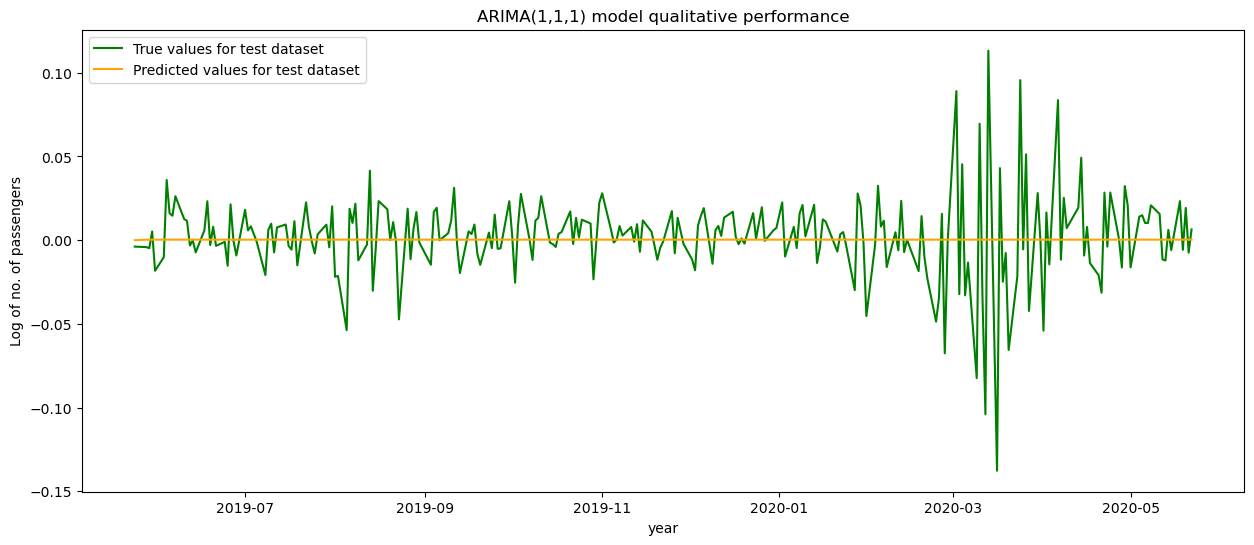

In [57]:
plt.figure(figsize = (15,6))
#plt.plot(ts_log['close'], color = 'green', label = 'Log Transformed Original data')
#plt.plot(model_fit.fittedvalues, color = 'blue', label = 'Predicted values for train dataset')

plt.plot(df_f["close"], color = 'green', label = 'True values for test dataset')
plt.plot(df_f["predicted_mean"], color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('year')
plt.ylabel('Log of no. of passengers')
plt.title('ARIMA(1,1,1) model qualitative performance')
plt.legend(loc = 'best')
plt.show()

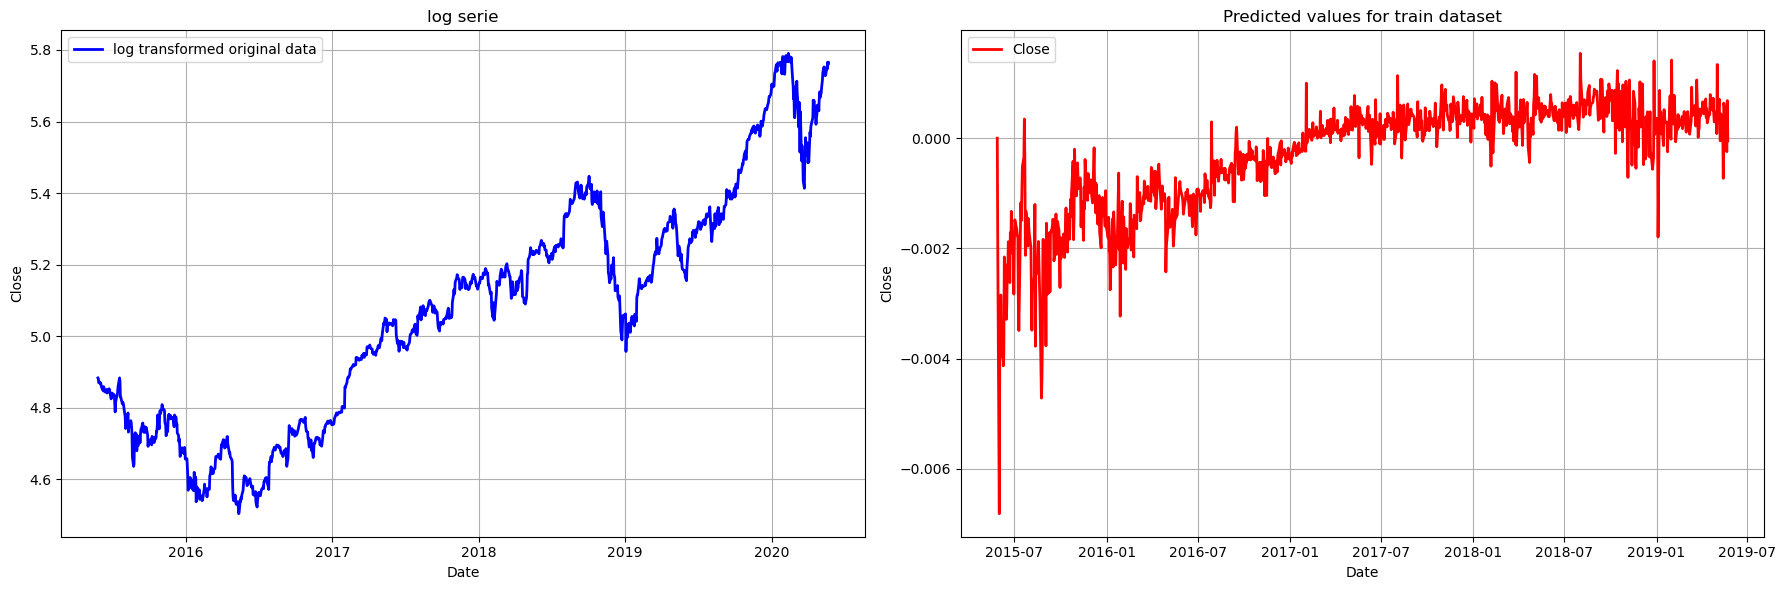

In [58]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# First plot
axs[0].plot(log_df['date'], log_df['close'], linewidth=2, color='b', label='log transformed original data')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close')
axs[0].set_title('log serie')
axs[0].legend()
axs[0].grid(True)

# Second plot
axs[1].plot(model_fit.fittedvalues, linewidth=2, color='r', label='Close')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close')
axs[1].set_title('Predicted values for train dataset')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Display both plots
plt.show()
